In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
import random

from scipy import rand
#prepare the dummy data
max_travel_count = 255
list_comuna = ['A', 'B','C','D','E','F','G']
comuna_size = len(list_comuna)
dict_src_dest = {}
for coumna_src in list_comuna:
    list_travel_count = []
    for coumna_dest in list_comuna:
        travel_count = 0
        if(coumna_src != coumna_dest):
            travel_count = random.randint(0, max_travel_count)
        
        list_travel_count.append(travel_count)

    dict_src_dest[coumna_src] = list_travel_count

dict_src_dest

{'A': [0, 51, 91, 26, 168, 147, 72],
 'B': [238, 0, 85, 66, 255, 5, 17],
 'C': [135, 109, 0, 11, 42, 22, 19],
 'D': [30, 162, 40, 0, 208, 182, 9],
 'E': [252, 210, 49, 185, 0, 57, 216],
 'F': [166, 41, 131, 27, 226, 0, 193],
 'G': [246, 60, 82, 51, 31, 25, 0]}

In [5]:
#X is From, Y is To
df = pd.DataFrame(dict_src_dest, index=list_comuna)
df

,A,B,C,D,E,F,G
A,0,238,135,30,252,166,246
B,51,0,109,162,210,41,60
C,91,85,0,40,49,131,82
D,26,66,11,0,185,27,51
E,168,255,42,208,0,226,31
F,147,5,22,182,57,0,25
G,72,17,19,9,216,193,0


<AxesSubplot:>

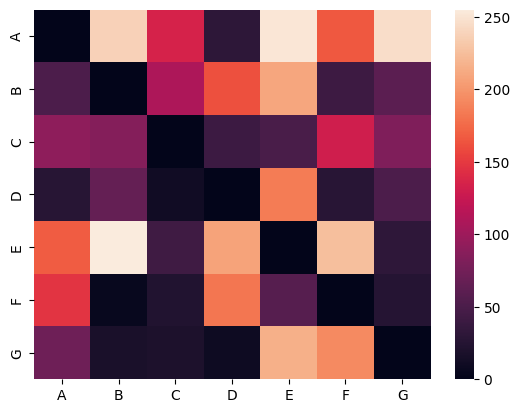

In [6]:
sns.heatmap(df, 
        xticklabels=df.columns,
        yticklabels=df.columns)

In [8]:
#the way to use np directly
mat = np.zeros(shape=(comuna_size, comuna_size), dtype=int)
mat

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [10]:
#set the value to the matrix
for comuna_src_index in range(comuna_size):
    comuna_src = list_comuna[comuna_src_index]
    for comuna_dest_index in range(comuna_size):
        mat[comuna_dest_index][comuna_src_index] = dict_src_dest[comuna_src][comuna_dest_index]

mat

array([[  0, 238, 135,  30, 252, 166, 246],
       [ 51,   0, 109, 162, 210,  41,  60],
       [ 91,  85,   0,  40,  49, 131,  82],
       [ 26,  66,  11,   0, 185,  27,  51],
       [168, 255,  42, 208,   0, 226,  31],
       [147,   5,  22, 182,  57,   0,  25],
       [ 72,  17,  19,   9, 216, 193,   0]])

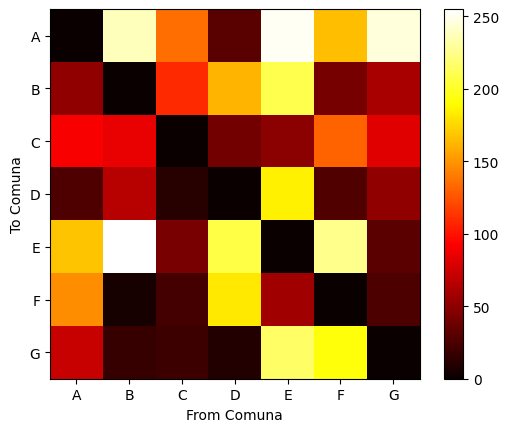

In [16]:
plt.imshow(mat, cmap='hot', interpolation='nearest')
plt.xlabel("From Comuna")
plt.ylabel("To Comuna")
plt.yticks(np.arange(comuna_size),list_comuna)
plt.xticks(np.arange(comuna_size),list_comuna)
plt.colorbar()
plt.show()